## Analizar la metricas de rendimientos

In [25]:
import torch
# Mi libreria:
%load_ext autoreload
%autoreload 2
from processLIDC import Patient
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
patient = Patient("LIDC-IDRI-0002")
patient.scale()

In [5]:
model = torch.jit.load('model_scripted.pt')
model.to('cuda')
model.eval()

RecursiveScriptModule(
  original_name=UNet
  (encoder1): RecursiveScriptModule(
    original_name=Sequential
    (enc1conv1): RecursiveScriptModule(original_name=Conv2d)
    (enc1norm1): RecursiveScriptModule(original_name=BatchNorm2d)
    (enc1relu1): RecursiveScriptModule(original_name=ReLU)
    (enc1conv2): RecursiveScriptModule(original_name=Conv2d)
    (enc1norm2): RecursiveScriptModule(original_name=BatchNorm2d)
    (enc1relu2): RecursiveScriptModule(original_name=ReLU)
  )
  (pool1): RecursiveScriptModule(original_name=MaxPool2d)
  (encoder2): RecursiveScriptModule(
    original_name=Sequential
    (enc2conv1): RecursiveScriptModule(original_name=Conv2d)
    (enc2norm1): RecursiveScriptModule(original_name=BatchNorm2d)
    (enc2relu1): RecursiveScriptModule(original_name=ReLU)
    (enc2conv2): RecursiveScriptModule(original_name=Conv2d)
    (enc2norm2): RecursiveScriptModule(original_name=BatchNorm2d)
    (enc2relu2): RecursiveScriptModule(original_name=ReLU)
  )
  (pool2): Rec

In [21]:
pred = patient.predict(model, slices=(176,), scaled=True, gpu = True)
images, mask = patient.get_tensors(scaled = False)
mask = mask.cpu().detach().numpy()

thres = 0.5
pred_bin = np.where(pred >= thres, 1, 0)

(256, 256)
(256, 256)
1 1.0


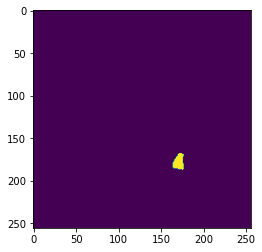

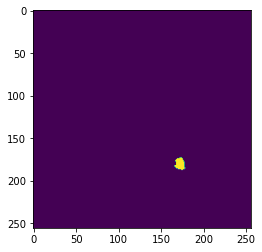

In [29]:
print(pred[0,0].shape)
print(mask[176].shape)
print(np.max(pred_bin), np.max(mask))

plt.imshow(mask[176])
plt.show()
plt.imshow(pred_bin[0,0])
plt.show()

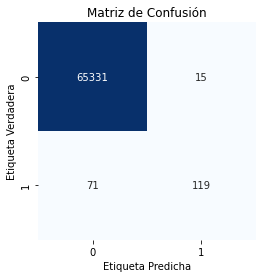

In [32]:

prediccion = pred_bin[0,0].ravel()

# Utilizando la función ravel()
label = mask[176].flatten()


cm = confusion_matrix(label, prediccion)

# Etiquetas de las clases
# labels = np.unique(mask)

# Crear figura y ejes
fig, ax = plt.subplots()

# Crear mapa de calor utilizando seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)  # , xticklabels=labels, yticklabels=labels)

# Añadir etiquetas a los ejes
ax.set_xlabel("Etiqueta Predicha")
ax.set_ylabel("Etiqueta Verdadera")

# Añadir título
ax.set_title("Matriz de Confusión")

# Mostrar la figura
plt.show()